In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


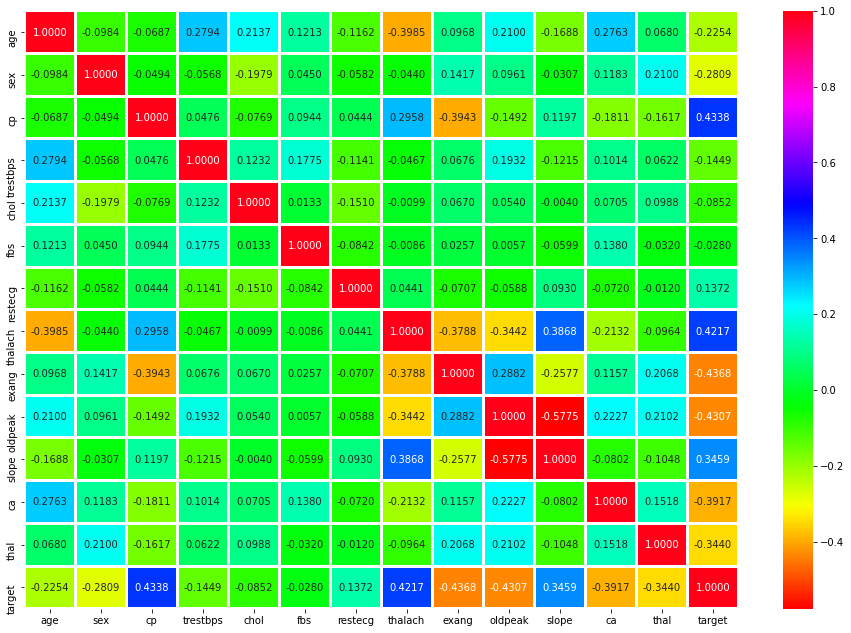

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#korelaciona matrica

plt.figure(figsize=(16,11))
sns.heatmap(dataset.corr(),annot=True,cmap='hsv',fmt='.4f',linewidths=2)
plt.show()

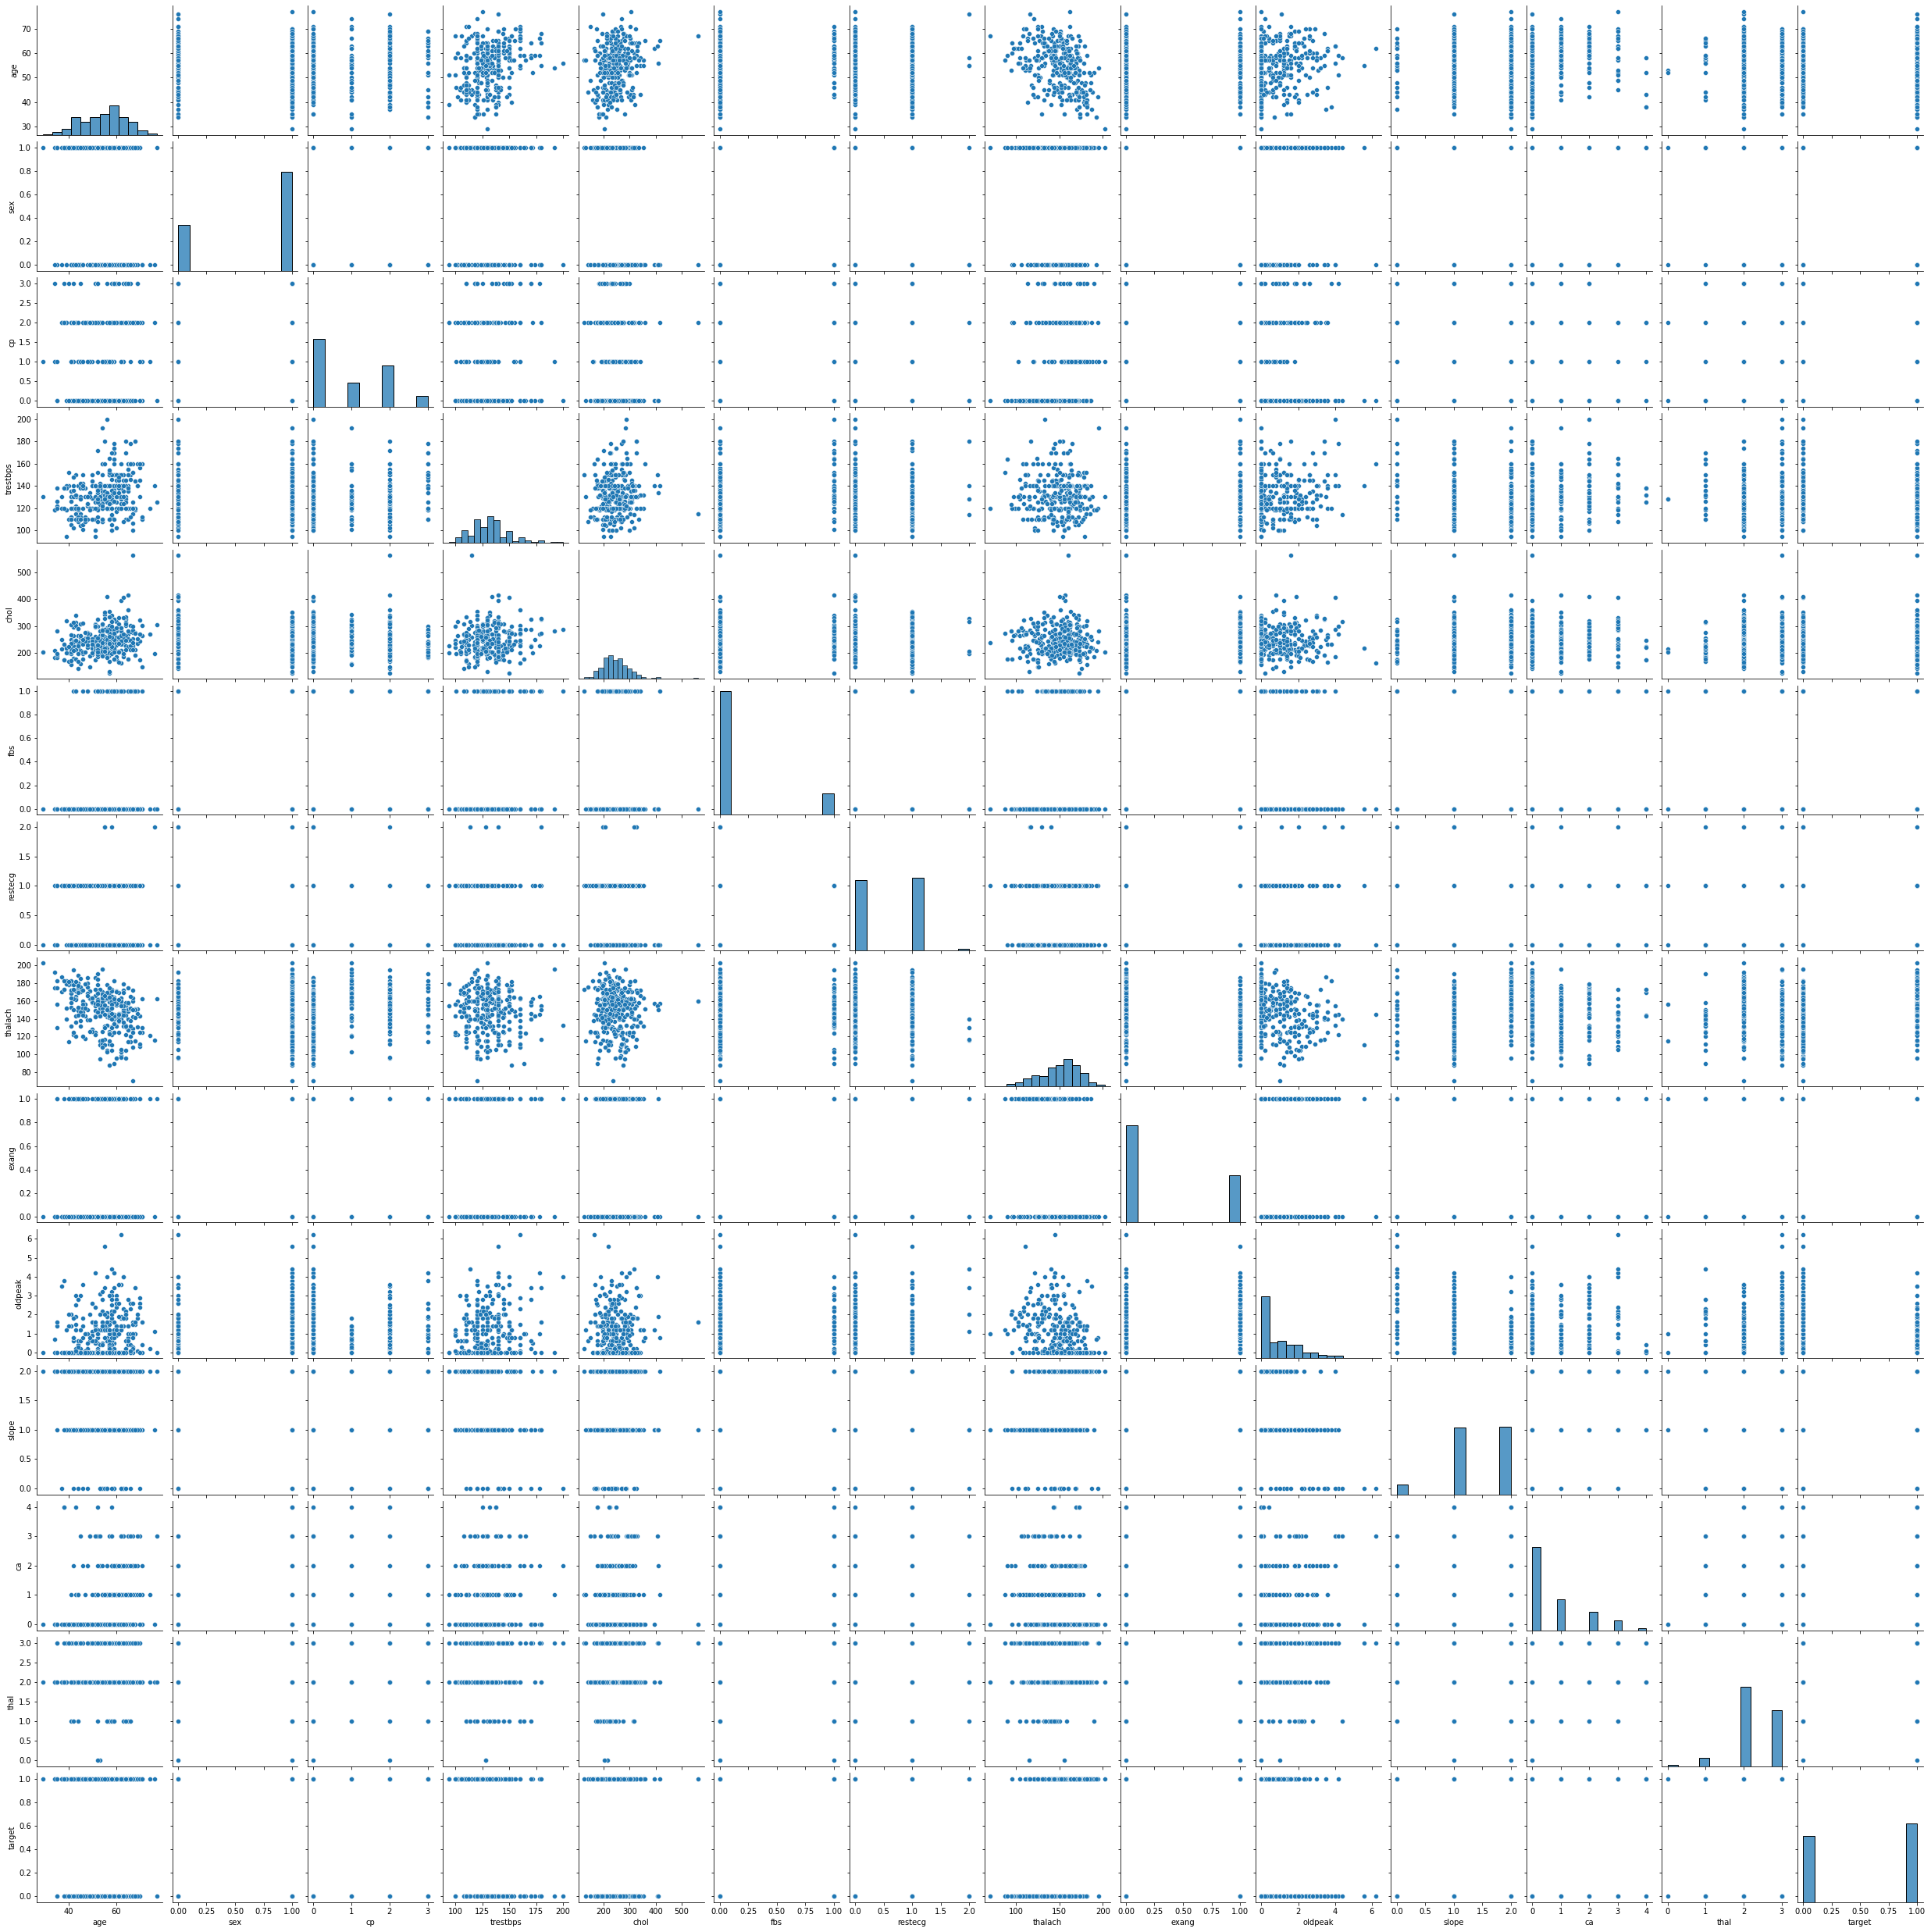

In [ ]:
sns.pairplot(dataset)

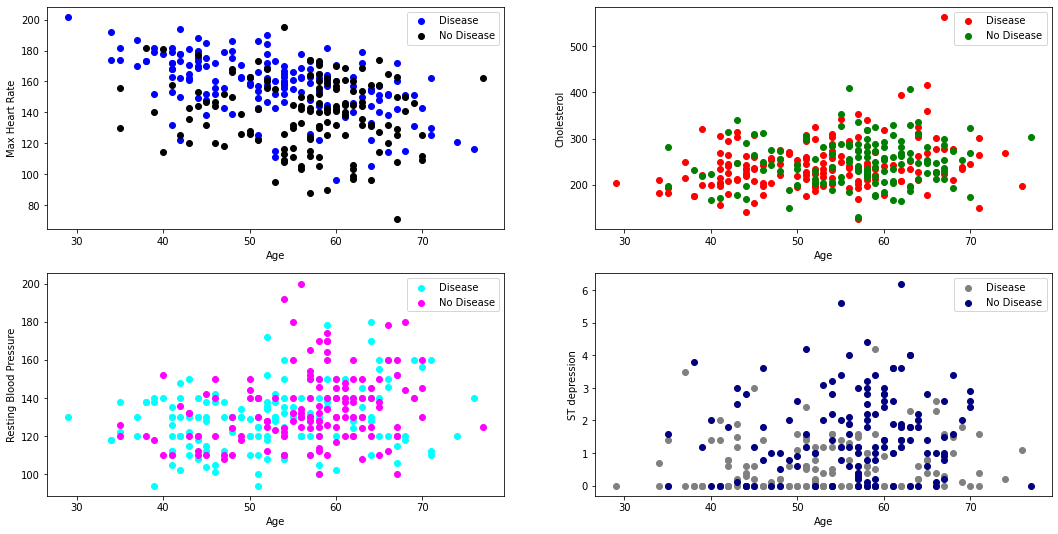

In [85]:
#scatterplot
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.scatter(x=dataset.age[dataset.target==1],y=dataset.thalach[dataset.target==1],c='blue')
plt.scatter(x=dataset.age[dataset.target==0],y=dataset.thalach[dataset.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=dataset.age[dataset.target==1],y=dataset.trestbps[dataset.target==1],c='cyan')
plt.scatter(x=dataset.age[dataset.target==0],y=dataset.trestbps[dataset.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=dataset.age[dataset.target==1],y=dataset.chol[dataset.target==1],c='red')
plt.scatter(x=dataset.age[dataset.target==0],y=dataset.chol[dataset.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=dataset.age[dataset.target==1],y=dataset.oldpeak[dataset.target==1],c='grey')
plt.scatter(x=dataset.age[dataset.target==0],y=dataset.oldpeak[dataset.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


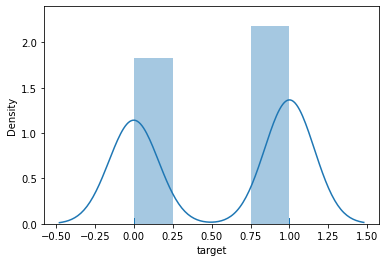

In [86]:
#histogram
sns.distplot(dataset['target'],rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


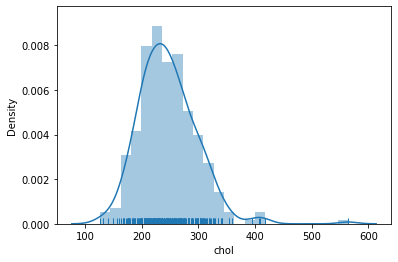

In [87]:
#histogram
sns.distplot(dataset['chol'],rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


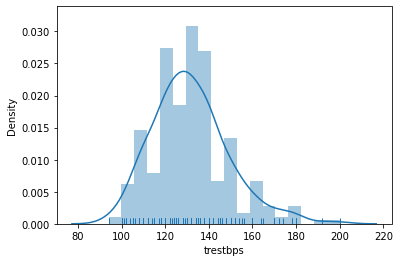

In [89]:
#histogram
sns.distplot(dataset['trestbps'],rug=True)
plt.show()

In [10]:
X = dataset.drop(['target'], axis = 1)
y = dataset.target.values

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [106]:
pca = PCA(n_components=2) 
X_PCA = pca.fit(X).transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

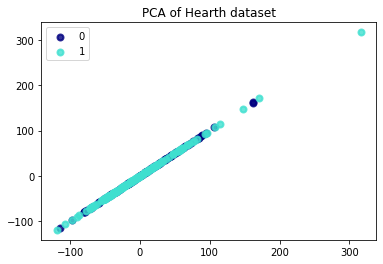

In [107]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_PCA[y == i, 0], X_PCA[y == i, 0], color=color, alpha=.8, lw=2,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Hearth dataset')
plt.show()

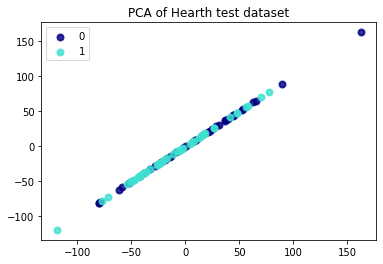

In [108]:

plt.figure() 
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 0], color=color, alpha=.8, lw=2,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Hearth test dataset')
plt.show()

In [109]:
#LDA model
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, Y_train) 
y_pred = lda.predict(X_test) 
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)

print("LDA accuracy for the original Hearth dataset", accuracy) 

LDA accuracy for the original Hearth dataset 0.802


Text(0.5, 1.0, 'LDA of Hearth dataset')

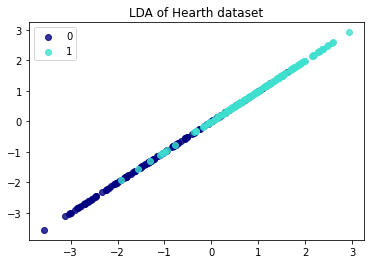

In [110]:
X_LDA = lda.fit(X, y).transform(X)  
X_LDA

colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_LDA[y == i, 0],X_LDA[y == i, 0],  alpha=.8, color=color,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Hearth dataset')

In [111]:
from sklearn.decomposition import PCA


lda1 = LinearDiscriminantAnalysis()
lda1.fit(X_PCA_train, y_PCA_train)
y_pred = lda1.predict(X_PCA_test)
accuracy = np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3)
print("LDA accuracy for the PCA dimensionaly reducted Hearth dataset", accuracy)

LDA accuracy for the PCA dimensionaly reducted Hearth dataset 0.758


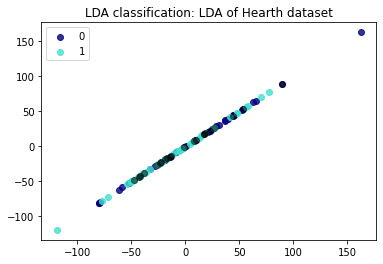

In [112]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 0], alpha=.8, color=color,
                label=i)
plt.title('LDA classification: LDA of Hearth dataset')

incorrect = y_pred==y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==False):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][0], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [113]:
gnb = GaussianNB() 
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)
print("Naive Bayes accuracy for the original Hearth dataset", accuracy)

Naive Bayes accuracy for the original Hearth dataset 0.835


In [114]:
gnb1 = GaussianNB()
gnb1.fit(X_PCA_train, y_PCA_train)
y_pred = gnb1.predict(X_PCA_test)
print("Naive Bayes accuracy for the PCA dimensionaly reducted Hearth dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

Naive Bayes accuracy for the PCA dimensionaly reducted Hearth dataset 0.725


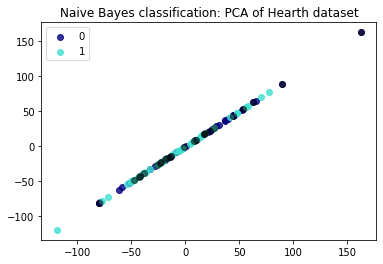

In [115]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 0], alpha=.8, color=color,
                label=i)
plt.title('Naive Bayes classification: PCA of Hearth dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][0], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [116]:
qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
y_pred = qda.predict(X_test)
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)
print("QDA accuracy for the original Hearth dataset", accuracy)

QDA accuracy for the original Hearth dataset 0.791


In [117]:
qda1= QuadraticDiscriminantAnalysis()
qda1.fit(X_PCA_train, y_PCA_train)
y_pred = qda1.predict(X_PCA_test)
print("QDA accuracy for the PCA dimensionaly reducted Hearth dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

QDA accuracy for the PCA dimensionaly reducted Hearth dataset 0.725


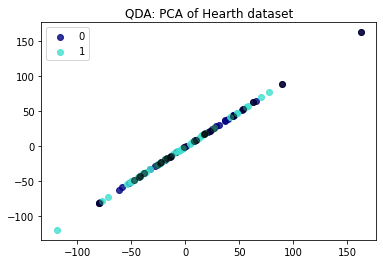

In [118]:

plt.figure()
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 0], alpha=.8, color=color,
                label=i)
plt.title('QDA: PCA of Hearth dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][0], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [119]:
#Najdobar accuracy za originalen dataset e za Naive Bayes classification.
#Najdobar accuracy za reduciraniot dataset e za LDA.